시각화 참고: https://neptune.ai/blog/plotly-python-tutorial-for-machine-learning-specialists


In [ ]:
import pandas as pd
!pip install datatable  #엑셀 파일 및 대용량 데이터를 가져오기 위해 필요한 datatable 모듈을 설치합니다
import datatable as dt

     |████████████████████████████████| 96.9 MB 89 kB/s 


In [ ]:
#카테고리 파일 불러오기
category_df = pd.read_csv('/content/drive/MyDrive/review_data_20220316/dogpre.gd_category_202203161107.csv',encoding='utf-8')

#상품번호 및 카테고리 파일(dogpre.gd_goods_link_202203161106) 불러오기
goods_link_df = pd.read_csv('/content/drive/MyDrive/review_data_20220316/dogpre.gd_goods_link_202203161106.csv',encoding='utf-8')

#상품번호 및 실제 리뷰 파일(dogpre.gd_goods_review_202203160949) 불러오기
datatable_df = dt.fread('/content/drive/MyDrive/review_data_20220316/dogpre.gd_goods_review_202203160949.csv',encoding='utf-8')
goods_review_df = datatable_df.to_pandas()

In [ ]:
#상품번호 및 카테고리 파일(dogpre.gd_goods_link_202203161106) 불러오기
goods_link_df = pd.read_csv('/content/drive/MyDrive/review_data_20220316/dogpre.gd_goods_link_202203161106.csv',encoding='utf-8')

카테고리 분포보기

In [ ]:
#모든 카테고리 추출
#wholecate_dic = category_df.set_index('category').T.to_dict('list')
#print(wholecate_dic)

In [ ]:
#20개 상위 카테고리 추출(상위 카테고리 번호는 두자리--> 하위 카테고리는 상위카테고리*1000대의 숫자)
super_category = category_df[category_df['category']<100]

supcate_dic = super_category.set_index('category').T.to_dict('list')
supcate_dic[0]=[None, '분류안됨'] #유효하지 않은 하위 카테고리에 부여될 상위 카테고리 0 생성

supcate_dic #key는 상위카테고리 코드, value[1]은 상위카테고리 이름이 됨

{0: [None, '분류안됨'],
 16: [128, '사은품', 15, 1, 0, nan, 0, nan, nan, 0],
 36: [364,
  '사료',
  0,
  0,
  1,
  'https://dogpre-upload.s3.ap-northeast-2.amazonaws.com/web/category/036.png',
  0,
  nan,
  nan,
  0],
 37: [370, '치아', 16, 1, 0, nan, 0, nan, nan, 0],
 38: [377,
  '건강관리',
  3,
  0,
  1,
  'https://dogpre-upload.s3.ap-northeast-2.amazonaws.com/web/category/038.png',
  0,
  nan,
  nan,
  0],
 39: [386,
  '위생/배변',
  4,
  0,
  1,
  'https://dogpre-upload.s3.ap-northeast-2.amazonaws.com/web/category/039.png',
  0,
  nan,
  nan,
  0],
 40: [391,
  '미용/목욕',
  5,
  0,
  1,
  'https://dogpre-upload.s3.ap-northeast-2.amazonaws.com/web/category/040.png',
  0,
  nan,
  nan,
  0],
 41: [401,
  '급식기/급수기',
  6,
  0,
  1,
  'https://dogpre-upload.s3.ap-northeast-2.amazonaws.com/web/category/041.png',
  0,
  nan,
  nan,
  0],
 42: [410,
  '하우스/울타리',
  7,
  0,
  1,
  'https://dogpre-upload.s3.ap-northeast-2.amazonaws.com/web/category/042.png',
  0,
  nan,
  nan,
  0],
 43: [417,
  '이동장',
  8,
  0,

In [ ]:
#상품 번호가 중복되는 경우
a = goods_link_df[goods_link_df.duplicated(['goodsno'])]#.sum()
len(a)
#b = a[a['supcate']==0] #상품번호가 중복이고 카테고리가 분류되지 않은 경우: 15394
#c = a[a['supcate']!=0] #상품번호가 중복이고 카테고리가 분류된 경우: 55
#print(len(b))
#c

15449

In [ ]:
goods_link_df=goods_link_df.drop_duplicates(['goodsno']) #상품번호 중복일 경우 데이터 제거
goods_link_df

,sno,goodsno,category,sort,hidden
0,4,4,1001,-1185200690,1
1,9,9,1001,-1185200694,1
2,11,11,1001,-1185200695,1
3,15,15,1002,0,1
4,18,18,1002,0,1
...,...,...,...,...,...
67598,170566,88175,39002,0,0
67599,170570,88266,40006,0,0
67600,170573,88241,51003,0,0
67601,170572,88230,38004,0,0


In [ ]:
#모든 상품의 카테고리 분포 보기

#하위카테고리를 모두 상위 카테고리로 변경
goods_link_df['supcate']=0

for i in supcate_dic: #카테고리의 범위가 상위카테고리에 속할 경우
  goods_link_df.loc[goods_link_df['category']==i,'supcate'] = i #상위 카테고리 그 자체일 경우
  goods_link_df.loc[(goods_link_df['category']>=i*1000) & (goods_link_df['category']<(i+1)*1000),'supcate'] = i 
  #하위카테고리일 경우 상위 카테고리를 적어줌
  
goods_link_df

,sno,goodsno,category,sort,hidden,supcate
0,4,4,1001,-1185200690,1,0
1,9,9,1001,-1185200694,1,0
2,11,11,1001,-1185200695,1,0
3,15,15,1002,0,1,0
4,18,18,1002,0,1,0
...,...,...,...,...,...,...
67598,170566,88175,39002,0,0,39
67599,170570,88266,40006,0,0,40
67600,170573,88241,51003,0,0,51
67601,170572,88230,38004,0,0,38


In [ ]:
#상위 카테고리에 해당하는 상품 개수 카운트하기
cate_counting = goods_link_df['supcate'].value_counts()
cate_counting

0     20272
44    11243
51     4344
45     3613
36     2891
42     2710
47     1193
40     1168
43      997
41      881
16      839
39      835
38      826
58      163
48      107
37       72
Name: supcate, dtype: int64

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

labels = [supcate_dic[i][1] for i in cate_counting.index]
values = cate_counting.values

fig = go.Figure(
    data=[go.Pie(labels=labels, values=values, hole=0.2)])

fig.update_layout(title_text=f"<b>전체 상품({len(goods_link_df)}개) 카테고리 비율(중복제거)</b>")
#fig.write_image("/content/drive/MyDrive/review_data_20220316/전체상품카테고리비율(중복제거).png")
fig.show()

모든 후기의 카테고리 분포보기

In [ ]:
len(goods_review_df)

4490421

In [ ]:
#모든 후기의 카테고리
#모든 후기 데이터프레임의 상품번호와 상품번호-카테고리 연결 데이터프레임의 상품번호를 왼쪽 외부조인 한다.
goods_review_df=goods_review_df[['goodsno','subject','contents','point']]
#print(len(goods_review_df))
cate_df = goods_link_df[['goodsno','category','supcate']]
review_cate = pd.merge(goods_review_df, cate_df, left_on='goodsno', right_on='goodsno', how='left')

In [ ]:
review_cate

,goodsno,subject,contents,point,category,supcate
0,37634,강아지들이 좋아라해요!~,이거 병원에서 1000원이던데~!\r\n 이게 원래는 사료라던데!~? 강쥐들이 죠아...,5.0,51003.0,51.0
1,37634,완전싸네요!!~,이거 집 앞 슈퍼에서 750원에 팝니당~\r\n양이 더 많을줄 알았는데 같네요\r\...,5.0,51003.0,51.0
2,37634,미끼용으로 좋습니다!! 추천!,사료줄때 ...몇개 넣어서주면 좋아요 ~^^...그래서 이번에 구매할때 이고 살려구...,5.0,51003.0,51.0
3,37634,잘먹습니다^-^,간식도 같은거 먹으면 금새 싫증내는데\r\n이건 물리지 않는지 잘먹어여,5.0,51003.0,51.0
4,2066,자주 간식을 줘야한다면 추천 ^^,우리강쥐는간식을항상줘야말을들어서 간식감당을못했거든요 \r\n근데 50p나되니 하루에...,5.0,51008.0,51.0
...,...,...,...,...,...,...
4490416,19139,아주 좋아해요,환장하고 먹어요 진짜 좋아해요,5.0,51008.0,51.0
4490417,57301,잘먹어요,너무 잘먹어서 자주 시켜요,5.0,51002.0,51.0
4490418,19142,아주 좋아해요,넘나 좋아해요 1등이에요,5.0,51002.0,51.0
4490419,46856,잘먹어요,유산균 함유된 스틱이라고 해서 주문해 봤고..\n딱딱하지 않아서 좋아요..\n멍이도...,5.0,51002.0,51.0


In [ ]:
review_cate['supcate'].isnull().sum() #카테고리가 분류되지 않은 상품 후기 개수

12729

In [ ]:
review_cate.loc[review_cate['supcate'].isnull(),'supcate']=0 #카테고리가 분류되지 못한 후기의 상위 카테고리를 0으로 분류
#review_cate['supcate'].isnull().sum() #카테고리가 분류되지 않은 상품 후기 개수

In [ ]:
#상위 카테고리에 해당하는 후기 개수 카운트하기
rcate_counting = review_cate['supcate'].value_counts()
rcate_counting

51.0    1842277
0.0      592539
36.0     402884
39.0     359292
47.0     312004
38.0     289902
40.0     271309
41.0     139832
45.0      90856
42.0      74694
44.0      68198
37.0      11459
43.0      11445
48.0       9970
58.0       7802
16.0       5958
Name: supcate, dtype: int64

In [ ]:
#전체 후기 카테고리 비율

labels = [supcate_dic[i][1] for i in rcate_counting.index]
values = rcate_counting.values

fig = go.Figure(
    data=[go.Pie(labels=labels, values=values, hole=0.2)])
    
fig.update_layout(title_text=f"<b>전체 후기({len(review_cate)}개) 카테고리 비율(중복제거)</b>")
#plotly.offline.plot(fig,filename="/content/drive/MyDrive/review_data_20220316/전체후기카테고리비율(중복제거).html")
fig.show()

In [ ]:
#평점별 후기 개수 카운트하기
point_counting = review_cate['point'].value_counts()
point_counting

5.0    3139856
4.0     885561
3.0     327637
2.0      83278
1.0      54082
0.0          7
Name: point, dtype: int64

In [ ]:
#평점이 오류가 난 경우
review_cate[review_cate['point']==0]

,goodsno,subject,contents,point,category,supcate
2928878,34988,쏘아베 물병,굿,0.0,41004.0,41.0
3819777,55404,좋아요,강아지가 좋아합니다.,0.0,51008.0,51.0
3819779,37853,좋아요,강아지가 좋아합니다.,0.0,51002.0,51.0
3819780,53358,좋아요,강아지가 좋아합니다.,0.0,51006.0,51.0
3821375,80269,좋아요,잘먹습니다 좋아요~~ !!,0.0,51003.0,51.0
3834090,20442,좋아요,강아지가 좋아합니다.,0.0,51008.0,51.0
3834091,55401,좋아요,강아지가 좋아합니다.,0.0,51008.0,51.0


In [ ]:
#평점이 1~5사이의 값을 갖는 경우
review_cate = review_cate[review_cate['point']!=0]
review_cate

,goodsno,subject,contents,point,category,supcate
0,37634,강아지들이 좋아라해요!~,이거 병원에서 1000원이던데~!\r\n 이게 원래는 사료라던데!~? 강쥐들이 죠아...,5.0,51003.0,51.0
1,37634,완전싸네요!!~,이거 집 앞 슈퍼에서 750원에 팝니당~\r\n양이 더 많을줄 알았는데 같네요\r\...,5.0,51003.0,51.0
2,37634,미끼용으로 좋습니다!! 추천!,사료줄때 ...몇개 넣어서주면 좋아요 ~^^...그래서 이번에 구매할때 이고 살려구...,5.0,51003.0,51.0
3,37634,잘먹습니다^-^,간식도 같은거 먹으면 금새 싫증내는데\r\n이건 물리지 않는지 잘먹어여,5.0,51003.0,51.0
4,2066,자주 간식을 줘야한다면 추천 ^^,우리강쥐는간식을항상줘야말을들어서 간식감당을못했거든요 \r\n근데 50p나되니 하루에...,5.0,51008.0,51.0
...,...,...,...,...,...,...
4490416,19139,아주 좋아해요,환장하고 먹어요 진짜 좋아해요,5.0,51008.0,51.0
4490417,57301,잘먹어요,너무 잘먹어서 자주 시켜요,5.0,51002.0,51.0
4490418,19142,아주 좋아해요,넘나 좋아해요 1등이에요,5.0,51002.0,51.0
4490419,46856,잘먹어요,유산균 함유된 스틱이라고 해서 주문해 봤고..\n딱딱하지 않아서 좋아요..\n멍이도...,5.0,51002.0,51.0


In [ ]:
#평점별 후기 개수 카운트하기
point_counting = review_cate['point'].value_counts()
point_counting

5.0    3139856
4.0     885561
3.0     327637
2.0      83278
1.0      54082
Name: point, dtype: int64

In [ ]:
#전체 후기 평점 비율
labels = [i for i in point_counting.index]
values = point_counting.values

fig = go.Figure(
    data=[go.Pie(labels=labels, values=values, hole=0.2)])
    
fig.update_layout(title_text=f"<b>이상치 제거 후 후기({len(review_cate)}개) 평점 비율</b>")
fig.show()

In [ ]:
#평점별 후기 보기
#후기 평점이 4점일 경우 데이터프레임
review_cate[review_cate['point']==4][['point','contents']]

,point,contents
7,4.0,"사료 15Kg 짜리 주문햇는데, 좀 늦는다고 전화주셔서\r\n배송은 늦엇지만, 그래..."
10,4.0,개띠도 아닌데 이거 보니까 맥주가 마시고 싶어지더만요\r\nㅋㅋㅋ 치즈도 쏙쏙 박혀...
13,4.0,"신발사이즈가 참애매모호해서,,\r\n첨엔,, 2호를 주문했는데,,ㅠ,ㅠ\r\n좀작아..."
22,4.0,딱딱해서 일반 케어껌보단 오래가요\r\n
34,4.0,우리강아지는 비스켓은 안먹던데 요건먹네여^^\r\n도기맨 먹인적이있는데 단단해서 안...
...,...,...
4490346,4.0,냄새도 없었구 진짜 금방 먹어 버리더라구요\n탈도 없어서 다행이구요\n
4490348,4.0,배송빠르고 아이들이 너무 좋아해요
4490349,4.0,배송빠르고 아이들이 너무 좋아해요.
4490350,4.0,배송빠르고 아이들이 너무 좋아해요.


In [ ]:
#후기 평점이 3점일 경우 데이터프레임
review_cate[review_cate['point']==3][['point','contents']]

,point,contents
24,3.0,약용샴푸라서 그런가요?\r\n그래도 향기가 좀 나면 좋을텐데 약냄새밖에 안나는거 같...
44,3.0,야채참치를 떠올리게하는 상품이구요.\r\n전 스프라구 해도 국물까지먹이진않구 그냥 ...
47,3.0,우리 아이가 사용하는 샴푸인데\r\n우선 향기는 좋아요 \r\n하지만 털이 뽀야게 ...
53,3.0,가격도 좋구 저렴해서 쉽게먹이기는 알맞은거같아요.\r\n\r\n
54,3.0,오티클렌스라구 노란색통인데 이건냄새가 좀독하다구하더군요. 이것도 유명하구 또 나머지...
...,...,...
4490332,3.0,그냥 그래요 잘안먹어요
4490335,3.0,너무 조아하는 간식인데 식탐이 많은 아이라 그냥 상켜버리기일쑤에요
4490369,3.0,입짧은 우리애는 잘안먹어요\n한통샀으면 눈물흘릴뻔...
4490377,3.0,안씹어요 하나씩 테스트해볼수있어서 좋았어요


워드크라우드 생성

In [ ]:
#한글 전처리 모델을 위한 셀
#한국어 NLP를 위한 ennjeon 라이브러리 설치합니다.
!pip install  konlpy
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
from konlpy.tag import Mecab
m = Mecab()

     |████████████████████████████████| 19.4 MB 17.3 MB/s 
     |████████████████████████████████| 448 kB 62.6 MB/s 
Installing automake (A dependency for mecab-ko)
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [84.8 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:1

In [ ]:
#후기 데이터프레임(review_cate) 전처리
import numpy as np
import re

def kextract(s):  #후기에서 한글만 뽑아 전처리하는 함수 작성
  hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')  #후기에서 한글만 추출
  result = hangul.sub(' ',str(s)) #한글이 아닌 문자일 경우 공백으로 대체
  return result

#함수 확인
kextract('강아지가 클때까지 먹이려고 큰거 샀는데..\r\n다른 쇼핑몰 보다 싸서 좋네요~\r...😂')

'강아지가 클때까지 먹이려고 큰거 샀는데 다른 쇼핑몰 보다 싸서 좋네요 '

In [ ]:
#모든 후기에서 subject열, content열, point열 항목만 가져오기
dataframe = review_cate[['subject','contents','point']]

#후기의 제목과 내용에서 한글만 추출
dataframe['contents'] = [kextract(s) for s in dataframe['contents']]
dataframe['subject'] = [kextract(s) for s in dataframe['subject']]
dataframe = dataframe.dropna(subset=['contents'], axis=0).reset_index(drop=True) #후기 내용이 NULL값인 행 제거

dataframe.isnull().sum()  #null값이 있는 열 확인

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



subject     0
contents    0
point       0
dtype: int64

In [ ]:
dataframe

,subject,contents,point
0,강아지들이 좋아라해요,이거 병원에서 원이던데 이게 원래는 사료라던데 강쥐들이 죠아라하죠 의사샘말에따...,5.0
1,완전싸네요,이거 집 앞 슈퍼에서 원에 팝니당 양이 더 많을줄 알았는데 같네요 요즘 울집 강쥐...,5.0
2,미끼용으로 좋습니다 추천,사료줄때 몇개 넣어서주면 좋아요 그래서 이번에 구매할때 이고 살려구요 ㅎㅎㅎㅎ,5.0
3,잘먹습니다,간식도 같은거 먹으면 금새 싫증내는데 이건 물리지 않는지 잘먹어여,5.0
4,자주 간식을 줘야한다면 추천,우리강쥐는간식을항상줘야말을들어서 간식감당을못했거든요 근데 나되니 하루에 번줘도...,5.0
...,...,...,...
4490409,아주 좋아해요,환장하고 먹어요 진짜 좋아해요,5.0
4490410,잘먹어요,너무 잘먹어서 자주 시켜요,5.0
4490411,아주 좋아해요,넘나 좋아해요 등이에요,5.0
4490412,잘먹어요,유산균 함유된 스틱이라고 해서 주문해 봤고 딱딱하지 않아서 좋아요 멍이도 잘먹구요,5.0


In [ ]:
#한글 추출 및 결측치 제거 이후 후기 개수 확인
print(len(review_cate),"->",len(dataframe)) #변화 없음

4490414 -> 4490414


In [ ]:
#평점별 워드 크라우드 생성을 위한 모듈 설치 및 불러오기
!pip install wordcloud
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
import nltk

In [ ]:
#워드클라우드 생성을 위한 한글폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

{f for f in sys_font if 'Nanum' in f}

Selecting previously unselected package fonts-nanum.
(Reading database ... 155487 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


{'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/

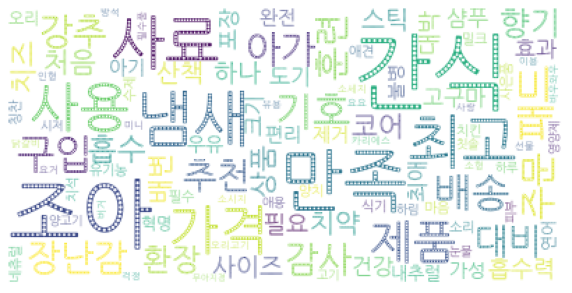

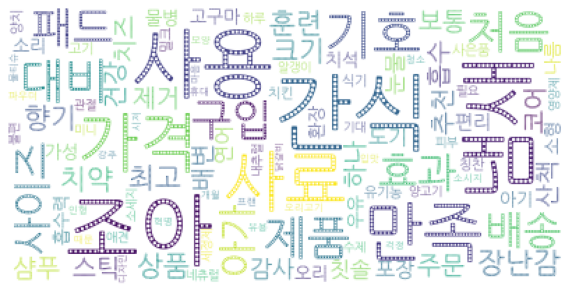

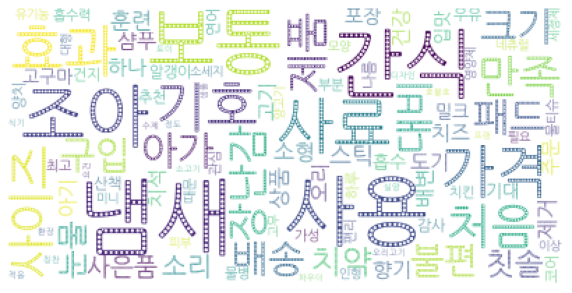

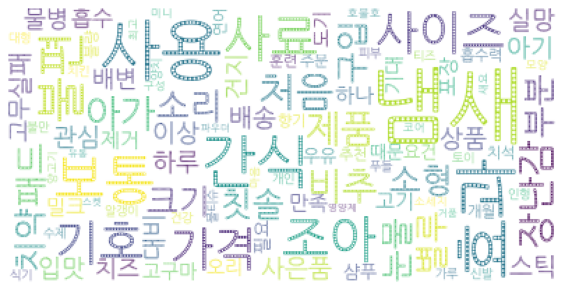

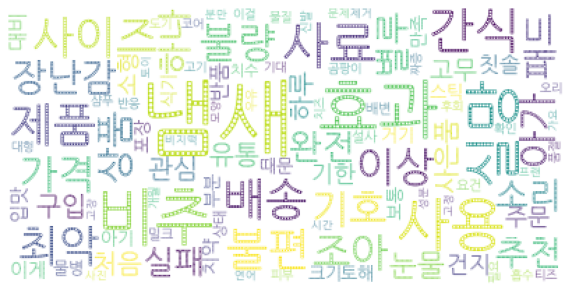

In [ ]:
twitter = Okt()

for i in range(5,0,-1):
  current_point = dataframe[dataframe['point']==i] #dataframe(전처리된 후기 데이터프레임)에서 평점이 i인 데이터만 추출
  subject_list = current_point['subject'].tolist() #제목만 리스트로
  content_list = current_point['contents'].tolist() #내용만 리스트로

  #후기들에 등장하는 단어들의 빈도수 확인을 위해 명사 추출
  dataset = []
  stopwords = ['구매','거','것','때','번','아이','중',
              '수','생각','데','강','쥐','이거','게','애','저희','듯',
              '후','전','요향','맘','건','제','나','이건','년','저','대통령','우리','이',
              '만','이번','편','건데','이걸로','편','개','다음','애기','집','견','내','강아지','이것','시','후기']  
              #우리: 소유격, 개: 진돗개라는 반복적인 리뷰에만 등장하는 단어, 집: '우리집 강아지'같은 단어에서 사용
              #강아지: 사용되는 빈도수가 너무 높아 제외

  for r in range(len(current_point)):
    tmp = subject_list[r]+' '+subject_list[r] #한 개의 후기의 제목과 내용을 하나의 문자열로 만들어 삽입
    tokens = m.nouns(tmp)
    tokens = [t for t in tokens if (t not in stopwords and len(t)!=1)]  #토큰이 제외 단어에 포함되어 있지 않거나 한글자가 아닐때
    dataset += tokens

  text = nltk.Text(dataset) # text에 저장하고
  topWord = text.vocab().most_common(100) #빈도수 상위 100개 단어 추출
  count = 100

  wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',background_color="white", max_font_size=60)
  cloud = wc.generate_from_frequencies(dict(topWord))

  plt.figure(figsize=(10, 8))
  plt.axis('off')
  plt.imshow(cloud)
  #plt.savefig('상암맛집.png', bbox_inches='tight')
  plt.show()

  # 생성된 WordCloud를 test.jpg로 보낸다.
  cloud.to_file(f"/content/drive/MyDrive/review_data_20220316/평점별 워드클라우드/평점{i}.png")

평점 별로 워드클라우드를 생성하여 빈도수가 높은 단어들을 확인해본 결과, 평점이 5점 및 4점인 경우에는 '조아, 만족, 최고, 강추, 감사, 추천' 등의 긍정적인 단어들이 있고 부정적인 단어를 찾기 어려웠다. 반면 평점이 1,2점인 경우에는 '실망, 불편, 실패, 비추, 별루' 등의 단어들이 공통적으로 두드러지게 등장하는 것을 확인할 수 있었다. '냄새'는 1에서 5점까지의 모든 평점에서 공통적으로 빈도수가 높은 단어이다. '냄새'는 4,5점에서는 '향기'와 함께 등장하는 반면 1,2점에서는 '향기'를 찾을 수 없었다. 평점이 중간값인 3점인 경우에는 4,5점에서 등장하는 '조아, 만족'같은 긍정적인 단어들과 함께 '보통, 불편'과 같은 다소 부정적인 어감이 드러나는 단어 또한 무시하기 어려운 빈도수로 등장했다.

그러므로 평점이 4,5점인 경우에는 긍정데이터로, 1,2점인 경우에는 부정데이터로 분류하기로 결정했다. 3점인 경우에는 사용하지 않는다.

In [ ]:
rcate_counting = review_cate['supcate'].value_counts()
rcate_counting #평점0점은 51번 카테고리에서 6개, 41번 카테고리에서 1개가 발생한 것을 알 수 있음

51.0    1842271
0.0      592539
36.0     402884
39.0     359292
47.0     312004
38.0     289902
40.0     271309
41.0     139831
45.0      90856
42.0      74694
44.0      68198
37.0      11459
43.0      11445
48.0       9970
58.0       7802
16.0       5958
Name: supcate, dtype: int64

In [60]:
rcate_counting=rcate_counting.to_dict()
rcate_counting

{0.0: 592539,
 16.0: 5958,
 36.0: 402884,
 37.0: 11459,
 38.0: 289902,
 39.0: 359292,
 40.0: 271309,
 41.0: 139831,
 42.0: 74694,
 43.0: 11445,
 44.0: 68198,
 45.0: 90856,
 47.0: 312004,
 48.0: 9970,
 51.0: 1842271,
 58.0: 7802}

In [63]:
#카테고리별로 긍정적, 부정적 후기 분류
for c in rcate_counting: #카테고리 번호와 빈도수 받기
  #한 카테고리 내에서의 평점 비율
  c_dataframe = dataframe[dataframe['supcate']==c] #카테고리 코드가 c인 데이터만 추출
  c_counting = c_dataframe['point'].value_counts() #추출된 데이터프레임의 평점값 및 빈도수 확인
  labels = [i for i in c_counting.index]
  values = c_counting.values

  fig = go.Figure(
      data=[go.Pie(labels=labels, values=values, hole=0.2)])
      
  fig.update_layout(title_text=f"<b>'{supcate_dic[c][1]}'카테고리 후기({rcate_counting[c]}개) 평점 비율</b>")
  #plotly.offline.plot(fig,filename="/content/drive/MyDrive/review_data_20220316/전체후기카테고리비율(중복제거).html")
  fig.show()